# Projet d’évaluation : Biostatistiques approfondies (Stat3)

## I. Loading the data

In [11]:
import os 
import sys
import numpy as np

# Get full library
sys.path.insert(0, os.path.abspath('..'))

# Install requirements
!pip3 install -r ProjetML/requirements.txt --user

In [22]:
import numpy as np
import pandas as pd
import torch
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from lib.LogisticRegressionModel import LogisticRegressionModel
from lib.NeuralNetwork import NeuralNetwork
from lib.PCA import PrincipalComponentAnalysis
from lib.RandomForestModel import RandomForestModel
from lib.SVMModel import SVMModel

### Data

In [8]:
data = pd.read_csv('ProjetML/data/data.csv', sep=",", index_col=0)

In [9]:
data.head()

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

          gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
sample_0    7.220030    9.119813   12.003135    9.650743    8.921326   
sample_1    6.256586    8.381612   12.674552   10.517059    9.397854   
sample_2    5.401607    9.911597    9.045255    9.788359   10.090470   
sample_3    8.942805    9.601208   11.392682    9.694814    9.684365   
sample_4    7.181162    9.846910   11.922439    9.217749    9.461191   

          gene_20529  gene_20530  
sample_0    5.286759         0.0  
sample_1    2.094168         0.0  
sample_2    1.683023         0.0  
sample_3    3.292001         0.0  
sample_4    5.110372         0.0  

[5 rows x 20531 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [4]:
import plotly.graph_objs as go
import plotly.offline as py

p = data.describe().T
p = p.round(4)
table = go.Table(
    columnwidth=[0.8]+[0.5]*8,
    header=dict(
        values=['Attribute'] + list(p.columns),
        line = dict(color='#506784'),
        fill = dict(color='lightblue'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506784'),
        fill = dict(color=['rgb(173, 216, 220)', '#f5f5fa'])
    )
)
py.iplot([table], filename='table-of-genes-data')

### Labels

In [14]:
labels = pd.read_csv('ProjetML/data/labels.csv', sep=",", index_col=0)
labels.head()

Class
sample_0  PRAD
sample_1  LUAD
sample_2  PRAD
sample_3  PRAD
sample_4  BRCA

In [24]:
# On récupère les noms des classes
list(labels['Class'].unique())

['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']

In [16]:
# Nous transformons les noms de classes en valeurs numériques à travers un mapping présenté ci-dessous

labels_unique_values = {
    'PRAD': 1,
    'LUAD': 2,
    'BRCA': 3,
    'KIRC': 4,
    'COAD': 5
}

labels['Class'] =  labels['Class'].map(labels_unique_values)

In [17]:
labels.head()

Class
sample_0      1
sample_1      2
sample_2      1
sample_3      1
sample_4      3

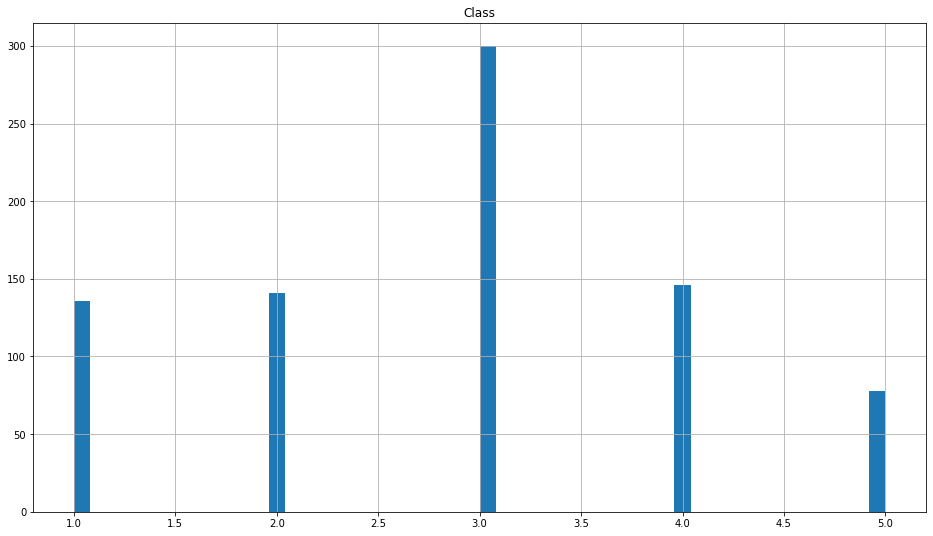

In [19]:
# Distribution des classes

labels.hist(bins=50,figsize=(16,9))
plt.show()

In [23]:
# Création des données d'apprentissage et des données de test

X_train, X_test, y_train, y_test = train_test_split(
    data, 
    labels, 
    test_size=0.2, 
    random_state=42
    )

# Analyse en composantes principales 

# Apprentissage par méthodes de Machine learning

## Logistic Regression

In [33]:
rf_parameters = {'rf__max_depth': np.arange(1, 101, 5)}

In [35]:
rf_model = RandomForestModel(
    X_train,
    X_test,
    np.array(np.transpose(y_train)).reshape(-1),
    np.array(np.transpose(y_test)).reshape(-1),
    rf_parameters
)

In [ ]:
rf_model.train(scaler=StandardScaler(), cv=3)

In [ ]:
rf_model.test()

## Support Vector Machine

## Random Forest

# Apprentissage par réseaux de neurones 

In [24]:
# Création du data loader
train_tensor = TensorDataset(
        torch.tensor(X_train.values.astype(np.float32)),
        torch.tensor(y_train.values.astype(np.float32))
    )

trainloader = DataLoader(
    train_tensor,
    batch_size=32,
    shuffle=True
)

test_tensor = TensorDataset(
    torch.tensor(X_test.values.astype(np.float32)),
    torch.tensor(y_test.values.astype(np.float32))
)

testloader = DataLoader(
    test_tensor,
    batch_size=32,
    shuffle=False
)

In [25]:
# Définition du modèle et des différents paramètres
neural_network = NeuralNetwork(
        input_size=20531,
        hidden_sizes=[1024, 256],
        output_size=5
    )

learning_rate = 0.001
num_epochs = 5
optimizer = optim.SGD(neural_network.parameters(), lr=learning_rate, momentum=0.9)

In [26]:
# On entraine le modèle
neural_network.train_model(trainloader, optimizer, num_epochs)

Training Epoch [5/5]: 100%|████████████████████| 20/20 [00:02<00:00,  7.87it/s]


In [27]:
# On teste le modèle
neural_network.test_model(testloader)

Test in progress: 100%|█| 6/6 [00:00<00:00, 26.57it/s, test_acc=1, test_loss=0]


(0.0, 1.0)